<a href="https://colab.research.google.com/github/KimHeeyeon2/KHY3/blob/master/g_11_0409_%E1%84%89%E1%85%A5%E1%86%AB%E1%84%92%E1%85%A7%E1%86%BC%E1%84%92%E1%85%AC%E1%84%80%E1%85%B1%EA%B0%9C%EB%85%90.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

선형회귀
==
- 선형회귀 함수사용
- 경사하강법 동작 이해

## 선형회귀 함수 사용법

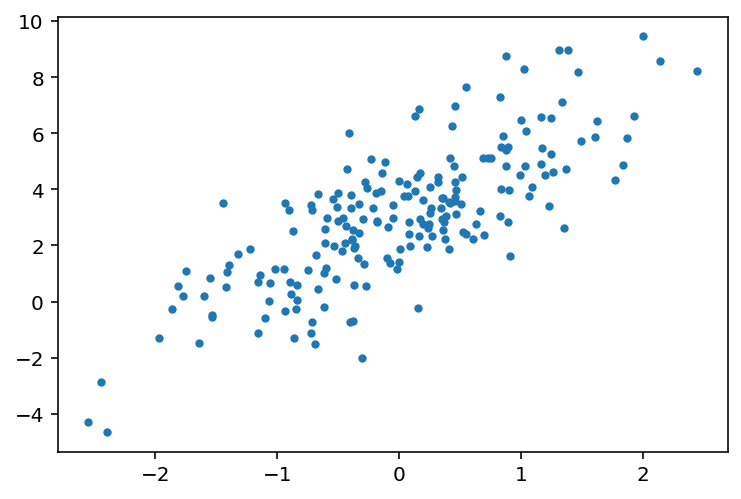

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

n_samples = 200 #샘플개수 200개
x = np.random.randn(n_samples) #정규분포갖는 샘플임

# 계수 및 절편
w = 2 #y=ax+b 에서 a= w 
b = 3
# 노이지 추가
y = w*x + b + np.random.randn(n_samples)*1.5   #noise 많이섞기 x2, 줄이기 x0.1
plt.scatter(x,y, s=10)

In [7]:
np.corrcoef(x,y) #correlation 상관관계 약 0.8정도 나왔음

array([[1.        , 0.77966451],
       [0.77966451, 1.        ]])

In [14]:
t = np.arange(12)

t.reshape(12,1) #[ 가 2개면 2차원이라는 의미,

array([[ 0],
       [ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10],
       [11]])

In [16]:
from sklearn.linear_model import LinearRegression #linear model 선형회귀
model = LinearRegression() #생성자 constructor, 객체를 생성하는것, 모델을 세팅함 
model.fit(x.reshape(-1,1), y) #fit 쓰면, 학습, GD최적화기 사용함 , default MSE 사용, -1,1 사용이유는 기본적으로 머신러닝은 2차원구조의 테이블형태여야하는데, x데이터는 1차원임, 그래서 1차원 구조를 2차원구조처럼 보이게 만들어주는것 -1은 알아서 앞을 맞춰주라는 의미임
print(model.coef_) #w 모델 파라미터 W, b
print(model.intercept_) #b

[2.05720849]
3.0298928421741547


## 모델을 예측에 사용하기

In [18]:
model.predict([[1],[5],[100]])

array([  5.08710133,  13.31593527, 208.75074142])

## 경사하강법 구현

변수가 1개인 경우
--

In [19]:
num_epoch = 10 #epoch 주어진 데이터를 몇번 사용할것인지 지정
lr = 0.7  #lr = learing rate , 학습률 GD 때 곱해지는 값

w = np.random.rand()
b = np.random.uniform()

for epoch in range(num_epoch):
    y_pred = w*x + b 
    error = np.abs(y_pred - y).mean() #abs - absolute mean 값
    print(f"{epoch:2} w = {w:.6f}, b = {b:.6f} , error = {error:.6f}")

#GD 알고리즘
    w = w - lr*((y_pred - y)* x).mean()
    b = b - lr*((y_pred - y)).mean()

 0 w = 0.892018, b = 0.098687 , error = 3.044701
 1 w = 1.592098, b = 2.150111 , error = 1.424923
 2 w = 1.871654, b = 2.765790 , error = 1.218975
 3 w = 1.983214, b = 2.950595 , error = 1.207852
 4 w = 2.027710, b = 3.006077 , error = 1.209423
 5 w = 2.045452, b = 3.022737 , error = 1.210443
 6 w = 2.052524, b = 3.027742 , error = 1.211008
 7 w = 2.055342, b = 3.029246 , error = 1.211230
 8 w = 2.056465, b = 3.029698 , error = 1.211313
 9 w = 2.056912, b = 3.029834 , error = 1.211344


변수가 2개인 경우
--

In [20]:
n_samples = 200
x1 = np.random.randn(n_samples)
x2 = np.random.randn(n_samples)

# multi variate (다중변수)
y = 2 * x1 + 3 * x2 + 4 + np.random.randn(n_samples)

leg = LinearRegression()
X = pd.DataFrame({'x1':x1, 'x2':x2})
leg.fit(X, y)

print(leg.coef_)
print(leg.intercept_)

[2.05069977 3.12070561]
4.002796773706946


In [21]:
leg.score(X,y)

0.9437910037754672

경사하강법
--

In [27]:
num_epoch = 10
lr =0.7  #learning rate 줄이면 찾는데 시간이 걸림, 너무 크면 값이 왔다갔다함~ 일반적으로 1보다 작게씀

w1 = np.random.uniform()
w2 = np.random.uniform()
b = np.random.uniform()

for epoch in range(num_epoch):
    y_pred = w1*x1 + w2*x2 + b
    error = np.abs(y_pred - y).mean()
    print(f"{epoch:2} w1 = {w1:.6f},  w2 = {w2:.6f}, b = {b:.6f} , error = {error:.6f}")

    w1 = w1 - lr*((y_pred - y)* x1).mean()
    w2 = w2 - lr*((y_pred - y)* x2).mean()
    b = b - lr*((y_pred - y)).mean()

 0 w1 = 0.445710,  w2 = 0.681397, b = 0.193617 , error = 4.131257
 1 w1 = 1.792864,  w2 = 2.678849, b = 2.795005 , error = 1.352394
 2 w1 = 2.018199,  w2 = 3.021644, b = 3.628262 , error = 0.871559
 3 w1 = 2.050611,  w2 = 3.094169, b = 3.887381 , error = 0.821259
 4 w1 = 2.052870,  w2 = 3.112832, b = 3.967245 , error = 0.816080
 5 w1 = 2.051871,  w2 = 3.118263, b = 3.991828 , error = 0.814995
 6 w1 = 2.051178,  w2 = 3.119936, b = 3.999406 , error = 0.814684
 7 w1 = 2.050875,  w2 = 3.120463, b = 4.001747 , error = 0.814598
 8 w1 = 2.050761,  w2 = 3.120629, b = 4.002471 , error = 0.814578
 9 w1 = 2.050720,  w2 = 3.120681, b = 4.002696 , error = 0.814572
